# Module 2 Spatial Operations

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
countries = geopandas.read_file("zip://data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://data/ne_50m_rivers_lake_centerlines.zip")

In [3]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [4]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [5]:
rivers.head()

,scalerank,featurecla,name,note,min_zoom,name_alt,name_en,min_label,geometry
0,6,Lake Centerline,Kama,None,5.0,None,Kama,6.0,"LINESTRING (51.93713 55.70107, 51.88087 55.686..."
1,6,River,Kama,None,5.0,None,Kama,6.0,"LINESTRING (53.69385 58.20632, 53.67715 58.273..."
2,3,Lake Centerline,Abay,None,3.0,None,Abay,4.0,"LINESTRING (37.11301 11.85499, 37.15037 11.893..."
3,3,Lake Centerline,Al Furat,None,3.0,None,Al Furat,4.0,"LINESTRING (38.56119 35.86264, 38.36534 35.903..."
4,6,Lake Centerline,Alabama,None,5.0,None,Alabama,6.0,"MULTILINESTRING ((-86.52177 33.03212, -86.5209..."


## Point

In [6]:
cities.loc[cities['name'] == 'Paris', 'geometry']

235    POINT (2.33139 48.86864)
Name: geometry, dtype: geometry

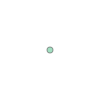

In [7]:
cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()

In [8]:
print(cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze())

POINT (2.33138946713035 48.86863878981461)


In [9]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

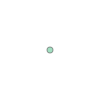

In [10]:
paris

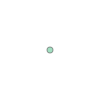

In [11]:
brussels

## Create Line

In [12]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

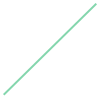

In [13]:
line

## Polygon

In [14]:
countries.loc[countries['name'] == 'Belgium', 'geometry']

12    POLYGON ((4.04707 51.26726, 4.97399 51.47502, ...
Name: geometry, dtype: geometry

In [15]:
print(countries.loc[countries['name'] == 'Belgium', 'geometry'].squeeze())

POLYGON ((4.047071160507528 51.26725861266857, 4.973991326526914 51.47502370869813, 5.606975945670001 51.03729848896978, 6.15665815595878 50.80372101501058, 6.043073357781111 50.12805166279423, 5.782417433300907 50.09032786722122, 5.674051954784829 49.5294835475575, 4.799221632515696 49.98537303323636, 4.286022983425084 49.90749664977255, 3.588184441755658 50.37899241800352, 3.123251580425659 50.78036326761455, 2.658422071960274 50.79684804951575, 2.513573032246114 51.14850617126189, 3.314971144228537 51.34578095153609, 3.31501148496416 51.34577662473805, 3.314971144228537 51.34575511331991, 4.047071160507528 51.26725861266857))


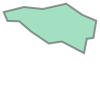

In [16]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].squeeze()
belgium

## Combining Shapes

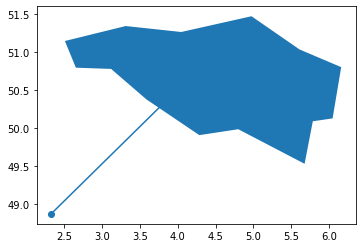

In [17]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot()

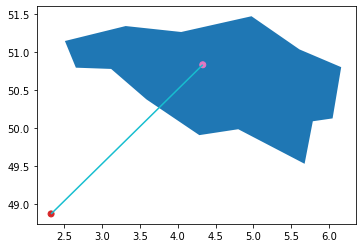

In [18]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

Text(4.047071160507528, 51.26725861266857, 'belgium')

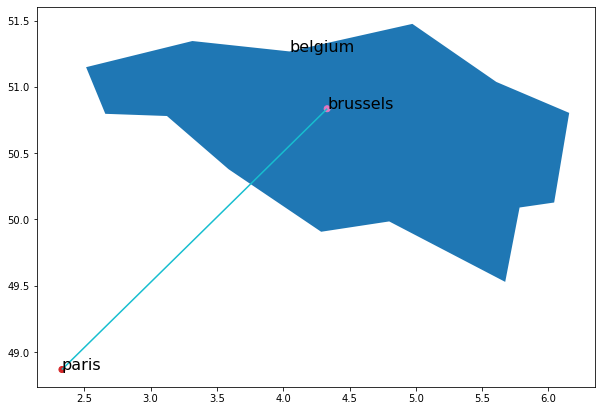

In [19]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10', figsize=(10,15))
plt.annotate(s='paris', xy=paris.coords[0], fontsize=16)
plt.annotate(s='brussels', xy=brussels.coords[0], fontsize=16)
plt.annotate(s='belgium', xy=belgium.exterior.coords[0], fontsize=16)

## Spatial Relationship

In [20]:
brussels.within(belgium)

True

In [21]:
belgium.within(brussels)

False

In [22]:
belgium.contains(brussels)

True

In [23]:
brussels.contains(belgium)

False

In [24]:
brussels.contains(line)

False

In [25]:
paris.within(belgium)

False

In [26]:
belgium.contains(line)

False

In [27]:
line.intersects(belgium)

True

In [28]:
line.crosses(belgium)

True

In [29]:
line.touches(belgium)

False

In [30]:
belgium.equals(belgium)

True

In [31]:
line.covers(paris)

True

In [32]:
line.intersects(paris)

True

In [33]:
paris.intersects(paris)

True

In [34]:
belgium.touches(belgium)

False

## Spatial relationships Boolean

In [35]:
countries[countries.contains(paris)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."


In [36]:
countries[countries.touches(belgium)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
41,DEU,Germany,Europe,80594017.0,3979000.0,"POLYGON ((13.59595 48.87717, 13.24336 48.41611..."
55,FRA,France,Europe,67106161.0,2699000.0,"MULTIPOLYGON (((2.51357 51.14851, 2.65842 50.7..."
97,LUX,Luxembourg,Europe,594130.0,58740.0,"POLYGON ((5.67405 49.52948, 5.78242 50.09033, ..."
117,NLD,Netherlands,Europe,17084719.0,870800.0,"POLYGON ((6.15666 50.80372, 5.60698 51.03730, ..."


(40.0, 60.0)

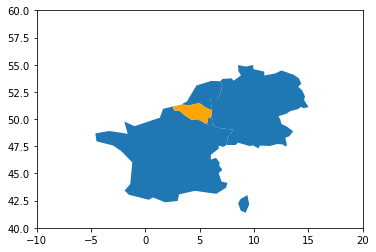

In [37]:
ax = countries[countries.touches(belgium)].plot()
countries[countries.name == 'Belgium'].plot(ax = ax, color='orange')
plt.xlim(-10, 20)
plt.ylim(40, 60)

## Ex: Spatial Relationship Boolean

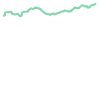

In [38]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()
amazon

In [39]:
countries[countries.crosses(amazon)]  # or .intersects

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
22,BRA,Brazil,South America,207353391.0,3081000.0,"POLYGON ((-57.62513 -30.21629, -56.29090 -28.8..."
35,COL,Colombia,South America,47698524.0,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
124,PER,Peru,South America,31036656.0,410400.0,"POLYGON ((-69.52968 -10.95173, -68.66508 -12.5..."


In [40]:
countries[countries.intersects(amazon)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
22,BRA,Brazil,South America,207353391.0,3081000.0,"POLYGON ((-57.62513 -30.21629, -56.29090 -28.8..."
35,COL,Colombia,South America,47698524.0,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
124,PER,Peru,South America,31036656.0,410400.0,"POLYGON ((-69.52968 -10.95173, -68.66508 -12.5..."


## Set-Operations with Overlay

In [41]:
# # Linux
# !apt install libspatialindex-dev

In [42]:
# # Mac OS
# !brew install spatialindex

In [43]:
!pip install rtree

In [44]:
from shapely.geometry import Polygon

polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),Polygon([(3,3), (5,3), (5,5), (3,5)])])
df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

In [45]:
df1

,geometry,df1
0,"POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....",1
1,"POLYGON ((2.00000 2.00000, 4.00000 2.00000, 4....",2


In [46]:
df2

,geometry,df2
0,"POLYGON ((1.00000 1.00000, 3.00000 1.00000, 3....",1
1,"POLYGON ((3.00000 3.00000, 5.00000 3.00000, 5....",2


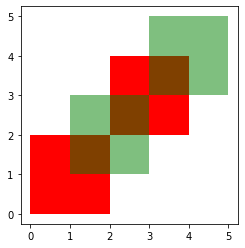

In [47]:
ax = df1.plot(color='red');
df2.plot(ax=ax, color='green', alpha=0.5);

In [48]:
df3 = geopandas.overlay(df1, df2, how='union')
df3

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4...."
3,1.0,NaN,"POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1...."
4,2.0,NaN,"MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000..."
5,NaN,1.0,"MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000..."
6,NaN,2.0,"POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5...."


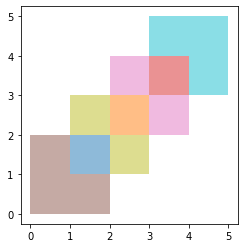

In [49]:
ax = df3.plot(color='red',alpha=0.5, cmap='tab10')

In [50]:
df4 = geopandas.overlay(df1, df2, how='intersection')
df4

,df1,df2,geometry
0,1,1,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2...."
1,2,1,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2,2,"POLYGON ((3.00000 4.00000, 4.00000 4.00000, 4...."


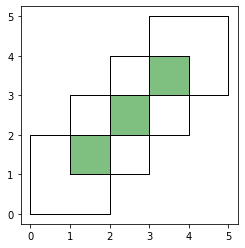

In [51]:
ax = df4.plot(color='green',alpha=0.5)
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [52]:
df5 = geopandas.overlay(df1, df2, how='difference')
df5

,geometry,df1
0,"POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1....",1
1,"MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000...",2


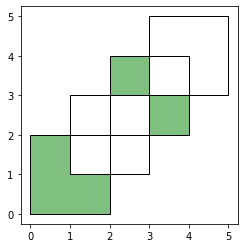

In [53]:
ax = df5.plot(color='green',alpha=0.5)
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [54]:
df6 = geopandas.overlay(df1, df2, how='symmetric_difference')
df6

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((0.00000 0.00000, 0.00000 2.00000, 1...."
1,2.0,NaN,"MULTIPOLYGON (((2.00000 3.00000, 2.00000 4.000..."
2,NaN,1.0,"MULTIPOLYGON (((1.00000 2.00000, 1.00000 3.000..."
3,NaN,2.0,"POLYGON ((3.00000 4.00000, 3.00000 5.00000, 5...."


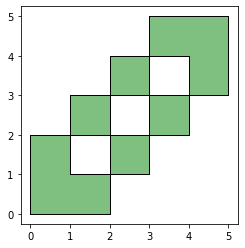

In [55]:
ax = df6.plot(color='green',alpha=0.5)
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

## Ex: Set-Operations with Overlay

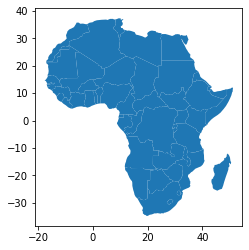

In [56]:
africa = countries[countries['continent'] == 'Africa']
africa.plot()

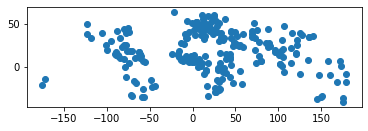

In [61]:
cities.plot()

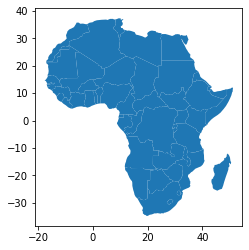

In [63]:
geopandas.overlay(africa, cities, how='difference').plot()

In [64]:
cities.geometry = cities.geometry.buffer(2)

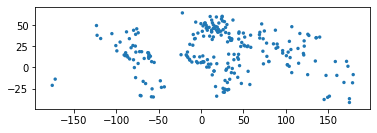

In [65]:
cities.plot()

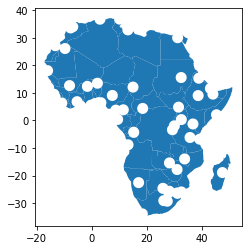

In [66]:
geopandas.overlay(africa, cities, how='difference').plot()

## SIngle Operation

In [ ]:
belgium

In [ ]:
print(brussels)

In [ ]:
print(brussels.buffer(1))

In [ ]:
geopandas.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

In [ ]:
brussels.buffer(1).intersection(belgium)

In [ ]:
brussels.buffer(1).union(belgium)

In [ ]:
brussels.buffer(1).difference(belgium)

In [ ]:
brussels.buffer(1).difference(belgium)

In [ ]:
belgium.difference(brussels.buffer(1))

## Unary Union

In [ ]:
polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),Polygon([(2,2), (4,2), (4,4), (2,4)])])
df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df1

In [ ]:
df1.plot()

In [ ]:
df7=df1.unary_union
df7

In [ ]:
print(df7)

## Ex: Unary Union

In [ ]:
africa_countries = countries[countries['continent'] == 'Africa']

In [ ]:
africa = africa_countries.unary_union

In [ ]:
africa

## Recap of Pandas DataFrame Join

In [ ]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

In [ ]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

### Inner and Outer Joins

In [ ]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

In [ ]:
pd.merge(df_a, df_b, on='subject_id', how='inner')

In [ ]:
pd.merge(df_a, df_b, on='subject_id') #by default inner join

In [ ]:
cities2 = cities[cities['name'].isin(['Bern', 'Brussels', 'London', 'Paris'])].copy()
cities2

In [ ]:
cities2['iso_a3'] = ['CHE', 'BEL', 'GBR', 'FRA']
cities2

In [ ]:
countries2 = countries[['iso_a3', 'name', 'continent']]
countries2.head()

In [ ]:
cities2.merge(countries2, on='iso_a3')

## Spatial Join

In [ ]:
cities.head()

In [ ]:
countries.head()

In [ ]:
cities_within_country = geopandas.sjoin(cities, countries, how='inner',op='within')
cities_within_country

In [ ]:
cities_within_country.plot(figsize = (10, 15))

In [ ]:
ax = countries.plot(figsize = (10, 15))
cities_within_country.plot(color = 'red', ax = ax)

In [ ]:
ax = countries[countries['name'].isin(cities_within_country['name_right'])].plot(figsize = (10, 15))
cities_within_country.plot(color = 'red', ax = ax)

In [ ]:
cities_with_country = geopandas.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country

In [ ]:
cities_with_country.plot(figsize = (10, 15))

In [ ]:
ax = countries.plot(figsize = (10, 15))
cities_with_country.plot(color = 'red', ax = ax)

In [ ]:
ax = countries[countries['name'].isin(cities_with_country['name_right'])].plot(figsize = (10, 15))
cities_with_country.plot(color = 'red', ax = ax)

In [ ]:
cities_within_country['continent'].value_counts()

In [ ]:
cities_with_country['continent'].value_counts()